In [1]:
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import numpy as np
import os
from PIL import Image

In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# 名称对应表
names_front = ["FK", "BK", "T", "H", "M", "E", "V", "V(R)", "V(L)", "X(R)", "X(L)", "O(5)", "Y", "FO(2)"]
names_complete = ["FK", "BK", "T", "H|M", "M", "E|V(L)", "V|HM", "V(R)", "V(L)", "X(R)", "X(L)", "S", "T(F)", 
                  "V|M", "T(B)", "M|H(B)", "E|V(R)", "V|FK", "FK, MAK", "FT, FKMAK", "FT, MBK", "M, BK", "M, FK", 
                  "V, BK", "VR, FKMAK", "H, BK", "VL, FKMAK", "AO(2)", "O(5), AK", "O(5), FKBK", "BO(2)", 
                  "O(5), BK", "Y, MATBK", "FO(2)"]

In [ ]:
# 收集路径
paths = [
    '../dataset/instruction-front', 
    '../dataset/instruction-complete'
]

## total

In [3]:
# 初始化统计数据
element_counts_list = []

for path in paths:
    img_files = os.listdir(path)

    element_counts = Counter()
    for f in img_files:
        img_path = os.path.join(path, f)
        try:
            img = np.array(Image.open(img_path)).astype(np.int32)
        except:
            continue
            
        cnt = Counter(img.flatten())
        element_counts += cnt
        
    element_counts_list.append(OrderedDict(sorted(element_counts.items())))
    print(f"路径 {path} 的元素统计：")
    print(OrderedDict(sorted(element_counts.items())))

路径 ../dataset/instruction-front 的元素统计：
OrderedDict([(0, 4908779), (1, 887212), (2, 133797), (3, 94733), (4, 104033), (5, 166), (6, 1471), (7, 138689), (8, 145304), (9, 23835), (10, 23886), (11, 18933), (12, 22904), (13, 11858)])
路径 ../dataset/instruction-complete 的元素统计：
OrderedDict([(0, 4388814), (1, 863149), (2, 9316), (3, 64909), (4, 95455), (7, 137247), (8, 143391), (9, 23835), (10, 23886), (12, 45763), (14, 4298), (18, 536224), (19, 65413), (20, 2406), (21, 4136), (22, 7944), (23, 2942), (24, 1756), (25, 23014), (26, 2277), (27, 9948), (28, 7767), (29, 7294), (30, 6444), (31, 7744), (32, 22904), (33, 7324)])


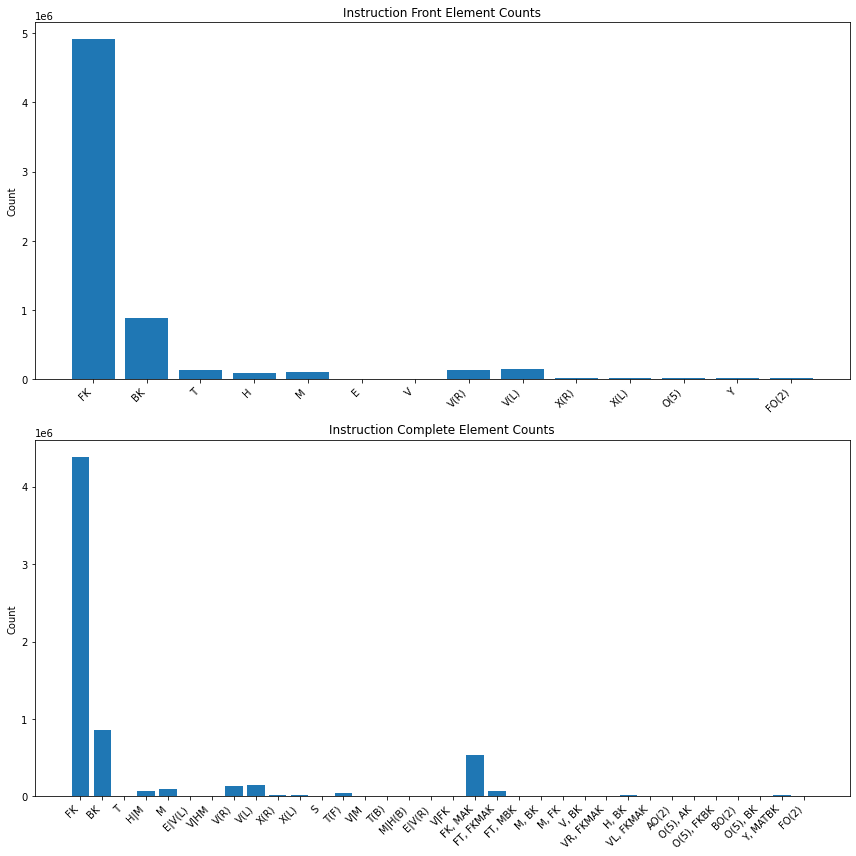

In [4]:
# 绘制柱状图
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# 绘制第一个柱状图（front）
counts_front = [element_counts_list[0].get(i, 0) for i in range(len(names_front))]
axes[0].bar(names_front, counts_front)
axes[0].set_title('Instruction Front Element Counts')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(names_front, rotation=45, ha='right')

# 绘制第二个柱状图（complete）
counts_complete = [element_counts_list[1].get(i, 0) for i in range(len(names_complete))]
axes[1].bar(names_complete, counts_complete)
axes[1].set_title('Instruction Complete Element Counts')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(names_complete, rotation=45, ha='right')

plt.tight_layout()
plt.show()


## balanced

In [6]:
# 初始化统计数据
element_counts_list = []

for path in paths:
    img_files = []
    with open('../dataset/test_real.txt', 'r') as f:
        for line in f:
            img_files.append(line.strip() + '.png')

    element_counts = Counter()
    for f in img_files:
        img_path = os.path.join(path, f)
        try:
            img = np.array(Image.open(img_path)).astype(np.int32)
        except:
            continue
            
        cnt = Counter(img.flatten())
        element_counts += cnt
        
    element_counts_list.append(OrderedDict(sorted(element_counts.items())))
    print(f"路径 {path} 的元素统计：")
    print(OrderedDict(sorted(element_counts.items())))

路径 ../dataset/instruction-front 的元素统计：
OrderedDict([(0, 1484133), (1, 209577), (2, 87510), (3, 41059), (4, 37223), (5, 166), (6, 1471), (7, 25359), (8, 25733), (9, 7031), (10, 7043), (11, 18933), (12, 22904), (13, 11858)])
路径 ../dataset/instruction-complete 的元素统计：
OrderedDict([(0, 964168), (1, 185514), (2, 4178), (3, 11235), (4, 28645), (7, 23917), (8, 23820), (9, 7031), (10, 7043), (12, 8482), (14, 430), (18, 536224), (19, 65413), (20, 2406), (21, 4136), (22, 7944), (23, 2942), (24, 1756), (25, 23014), (26, 2277), (27, 9948), (28, 7767), (29, 7294), (30, 6444), (31, 7744), (32, 22904), (33, 7324)])


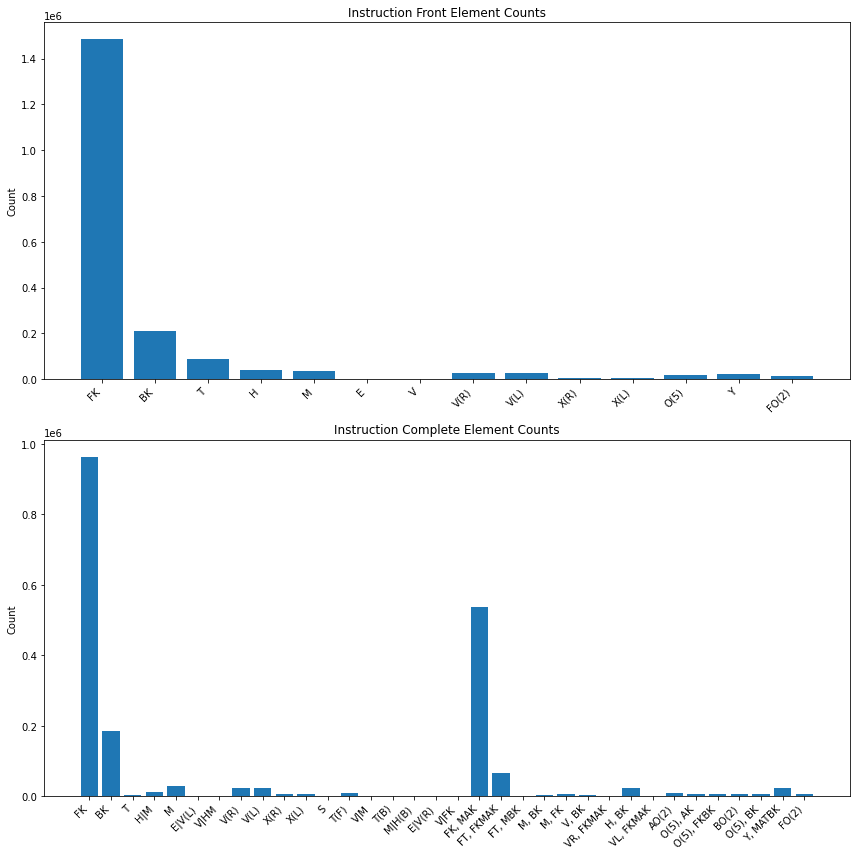

In [7]:
# 绘制柱状图
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# 绘制第一个柱状图（front）
counts_front = [element_counts_list[0].get(i, 0) for i in range(len(names_front))]
axes[0].bar(names_front, counts_front)
axes[0].set_title('Instruction Front Element Counts')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(names_front, rotation=45, ha='right')

# 绘制第二个柱状图（complete）
counts_complete = [element_counts_list[1].get(i, 0) for i in range(len(names_complete))]
axes[1].bar(names_complete, counts_complete)
axes[1].set_title('Instruction Complete Element Counts')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(names_complete, rotation=45, ha='right')

plt.tight_layout()
plt.show()